Лабораторная работ №2:      
    https://www.kaggle.com/datasets/nasa/meteorite-landings/
    Этот набор данных включает местоположение, массу, состав и год падения более 45000 метеоритов, упавших на нашу планету.

In [106]:
import pandas as pd
df = pd.read_csv('meteorite-landings.csv')
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


Буду работать только со следующими атрибутами: mass, year, reclat, reclong
Для работы создам новый дата фрейм df, который будет включать в себя только эти атрибуты.

In [109]:
df = df[[ 'mass', 'year', 'reclat', 'reclong']]
df.head()

,mass,year,reclat,reclong
0,21.0,1880.0,50.77500,6.08333
1,720.0,1951.0,56.18333,10.23333
2,107000.0,1952.0,54.21667,-113.00000
3,1914.0,1976.0,16.88333,-99.90000
4,780.0,1902.0,-33.16667,-64.95000


1. К текущему датасету необходимо добавить новый аттрибут, например, если есть дата рождения, то посчитать возраст или определить популярность фильма по количеству просмотров и т.п.

Создам новый атрибут, значениями которого будут названия материков, в которых обнаружили метеорит. Значения этого атрибута
будут высчитываться на основе атрибутов 'reclat' и 'reclong'.

In [110]:
import pandas as pd
import numpy as np
from shapely.geometry import Point

def get_continent(row):
    lat = row["reclat"]
    lon = row["reclong"]

    if (lat>-56 and lat<12) and (lon>-81 and lon<-35):
        return 'South America'
    elif (lat>8 and lat<72) and (lon>-168 and lon<-56):
        return 'North America'
    elif (lat>1 and lat<78) and (lon>-170 and lon<-9):
        return 'Eurasia'
    elif (lat>-35 and lat<38) and (lon>-17 and lon<51):
        return 'Africa'
    elif (lat>-39 and lat<-10) and (lon>113 and lon<153):
        return 'Australis'
    elif (lat>-63 and lat<0):
        return 'Antarctica'
    else:
        return 'Ocean'
        

df["Continent"] = df.apply(lambda row: get_continent(row), axis=1)

In [111]:
df.head()

,mass,year,reclat,reclong,Continent
0,21.0,1880.0,50.77500,6.08333,Ocean
1,720.0,1951.0,56.18333,10.23333,Ocean
2,107000.0,1952.0,54.21667,-113.00000,North America
3,1914.0,1976.0,16.88333,-99.90000,North America
4,780.0,1902.0,-33.16667,-64.95000,South America


Тут я поняла, что, наверное, имелось в виду добавить атрибут с числовым типом данных...

Создам новый атрибут, который будет высчитывать возраст метеорита (на момент 2023 года).

In [112]:
df['Age'] = 2023 - df['year']

In [113]:
df.head()

,mass,year,reclat,reclong,Continent,Age
0,21.0,1880.0,50.77500,6.08333,Ocean,143.0
1,720.0,1951.0,56.18333,10.23333,Ocean,72.0
2,107000.0,1952.0,54.21667,-113.00000,North America,71.0
3,1914.0,1976.0,16.88333,-99.90000,North America,47.0
4,780.0,1902.0,-33.16667,-64.95000,South America,121.0


2. "Причесать" датасет: удалить выбросы и дубли, обработать пропущенные значения, найти кривые данные и т.п.

Удаляем дубликаты:

In [114]:
df.drop_duplicates ()

,mass,year,reclat,reclong,Continent,Age
0,21.0,1880.0,50.77500,6.08333,Ocean,143.0
1,720.0,1951.0,56.18333,10.23333,Ocean,72.0
2,107000.0,1952.0,54.21667,-113.00000,North America,71.0
3,1914.0,1976.0,16.88333,-99.90000,North America,47.0
4,780.0,1902.0,-33.16667,-64.95000,South America,121.0
...,...,...,...,...,...,...
45711,172.0,1990.0,29.03700,17.01850,Africa,33.0
45712,46.0,1999.0,13.78333,8.96667,Africa,24.0
45713,3.3,1939.0,49.25000,17.66667,Ocean,84.0
45714,2167.0,2003.0,49.78917,41.50460,Ocean,20.0


Удаляем выбосы:

In [7]:
df = df[['mass', 'year','Age', 'reclat', 'reclong']]

In [ ]:
import scipy.stats as stats

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = df.apply(stats.iqr)
df_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df_clean

Обработка пропущенных значений:

In [10]:
missing_values = df.isnull()
num_missing_values = missing_values.sum()
print("Количество пропущенных значений:")
i=0
for column in df.columns:
    print(f"{column}: {num_missing_values[i]}")
    i += 1

Количество пропущенных значений:
mass: 131
year: 288
Age: 288
reclat: 7315
reclong: 7315


In [13]:
for column in df.columns:
    mean_value=df[column].mean()
    df[column].fillna(value=mean_value, inplace=True) 

Проверим теперь количество пропущенных значений:

In [14]:
missing_values = df.isnull()
num_missing_values = missing_values.sum()
print("Количество пропущенных значений:")
i=0
for column in df.columns:
    print(f"{column}: {num_missing_values[i]}")
    i += 1

Количество пропущенных значений:
mass: 0
year: 0
Age: 0
reclat: 0
reclong: 0


3)Построить графики зависимости одной переменной от другой (plt.scatter), описать какие кластеры (группы) вы видите. Построить несколько разных графиков, найти ярковыраженные группы.

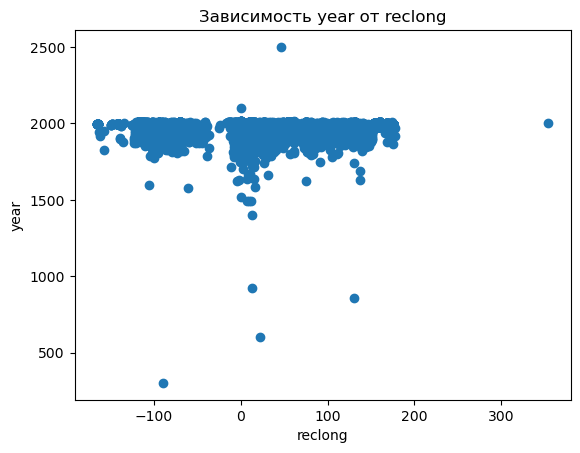

In [41]:
import matplotlib.pyplot as plt

plt.xlabel('reclong')
plt.ylabel('year')
plt.title('Зависимость year от reclong')
plt.scatter(df['reclong'], df['year'])
plt.show()

На этом графике я могу определить 2 кластера, один из которых расположен на reclong от -100 до 0 и воторой от 0 до 200.

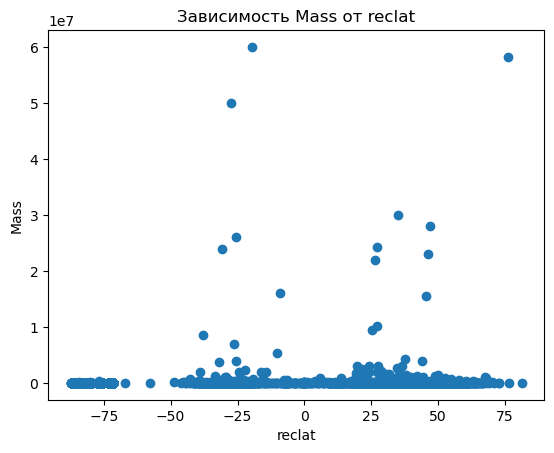

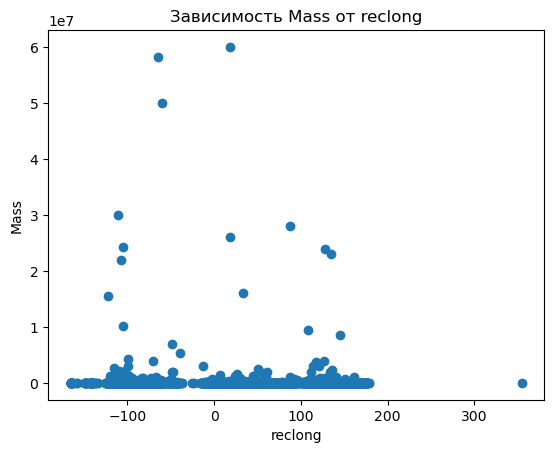

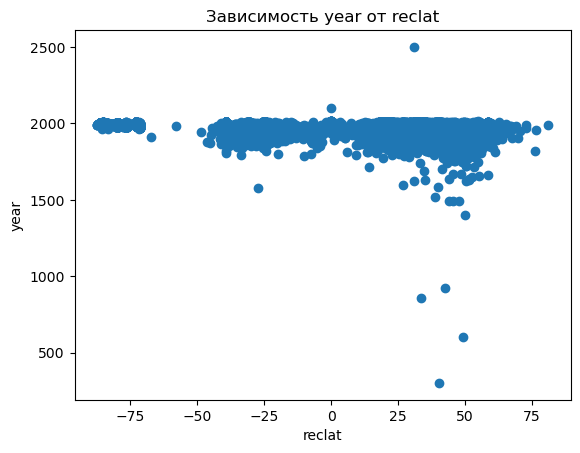

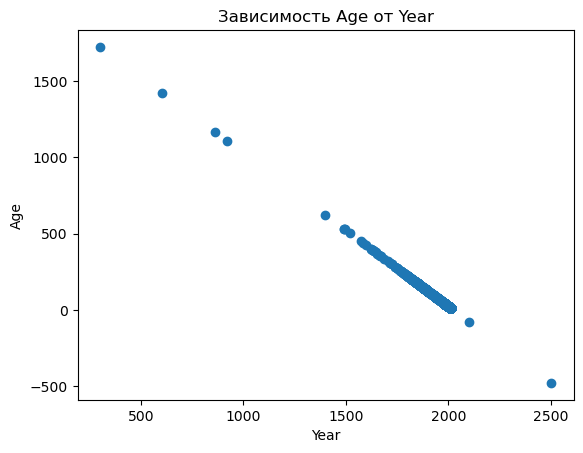

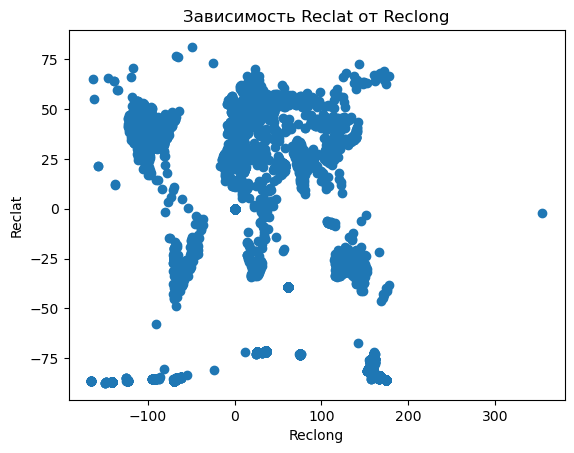

In [45]:
plt.xlabel('reclat')
plt.ylabel('Mass')
plt.title('Зависимость Mass от reclat')
plt.scatter(df['reclat'], df['mass'])
plt.show()

plt.xlabel('reclong')
plt.ylabel('Mass')
plt.title('Зависимость Mass от reclong')
plt.scatter(df['reclong'], df['mass'])
plt.show()

plt.xlabel('reclat')
plt.ylabel('year')
plt.title('Зависимость year от reclat')
plt.scatter(df['reclat'], df['year'])
plt.show()

plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Зависимость Age от Year')
plt.scatter(df['year'], df['Age'])
plt.show()

plt.xlabel('Reclong')
plt.ylabel('Reclat')
plt.title('Зависимость Reclat от Reclong')
plt.scatter(df['reclong'], df['reclat'])
plt.show()

На всех построенных графиках видны ярковыраженные группы.

4. Изучить перечисленные ноутбуки, по примеру, попробовать применить метод KMeans к вашему датасету

In [73]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
df.head()

,mass,year,Age,reclat,reclong
0,21.0,1880.0,143.0,50.77500,6.08333
1,720.0,1951.0,72.0,56.18333,10.23333
2,107000.0,1952.0,71.0,54.21667,-113.00000
3,1914.0,1976.0,47.0,16.88333,-99.90000
4,780.0,1902.0,121.0,-33.16667,-64.95000


Проверим основные значения атрибута 'reclong' в датасете.

In [65]:
df['reclong'].describe()

count    45716.000000
mean        61.074319
std         73.913892
min       -165.433330
25%         13.256125
50%         58.411565
75%        155.750000
max        354.473330
Name: reclong, dtype: float64

Нормализуйю данные с помощью масштабирования MinMax, предоставляемого sklearn

In [67]:
from sklearn import preprocessing
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df)

In [69]:
df_scaled = pd.DataFrame(minmax_processed, index=df.index, columns=df.columns[:])

In [70]:
df_scaled.head()

,mass,year,Age,reclat,reclong
0,3.500000e-07,0.717727,0.282273,0.819670,0.329899
1,1.200000e-05,0.750000,0.250000,0.851760,0.337881
2,1.783333e-03,0.750455,0.249545,0.840091,0.100851
3,3.190000e-05,0.761364,0.238636,0.618572,0.126048
4,1.300000e-05,0.727727,0.272273,0.321598,0.193272


Найдём оптимальное количество кластеров для метода kMeans

In [82]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters = 1, n_init = 10)]

In [ ]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]

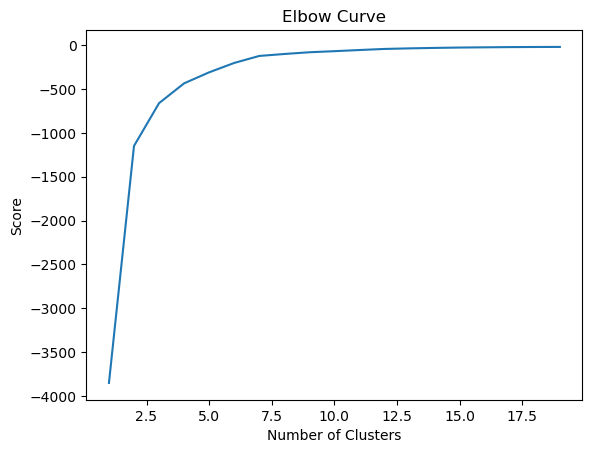

In [85]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

На графике видно, что оптимальным числом кластеров для алгоритма будет 5.

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_scaled)

In [88]:
len(kmeans.labels_)

45716

In [90]:
df['cluster'] = kmeans.labels_

In [91]:
df.head()

,mass,year,Age,reclat,reclong,cluster
0,21.0,1880.0,143.0,50.77500,6.08333,4
1,720.0,1951.0,72.0,56.18333,10.23333,4
2,107000.0,1952.0,71.0,54.21667,-113.00000,4
3,1914.0,1976.0,47.0,16.88333,-99.90000,4
4,780.0,1902.0,121.0,-33.16667,-64.95000,3


Посмотрим на размеры кластеров:

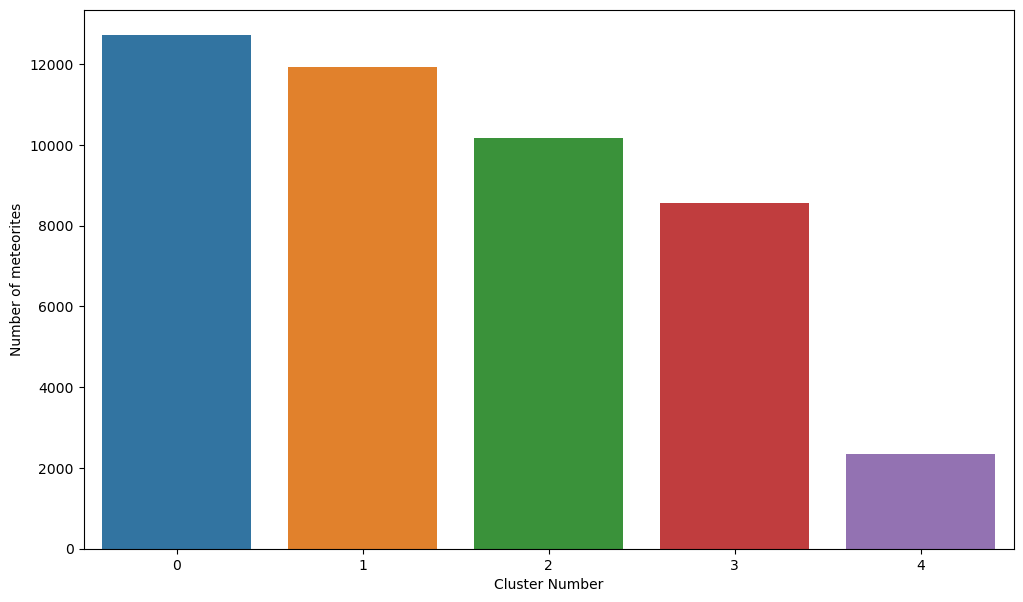

In [92]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=df.groupby(['cluster']).count()['reclong'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of meteorites")

Посмотрим на значения кластеров:

In [94]:
df.groupby(['cluster']).mean()

,mass,year,Age,reclat,reclong
cluster,,,,,
0,11435.010024,1998.889652,24.110348,11.651054,20.021348
1,216.083281,1991.716119,31.283881,-80.311739,161.633423
2,157.143889,1988.861913,34.138087,-73.721221,28.493319
3,25597.400248,1998.611747,24.388253,-37.537614,58.627705
4,101667.221241,1941.213383,81.786617,39.439933,-77.188168


5. Выводы

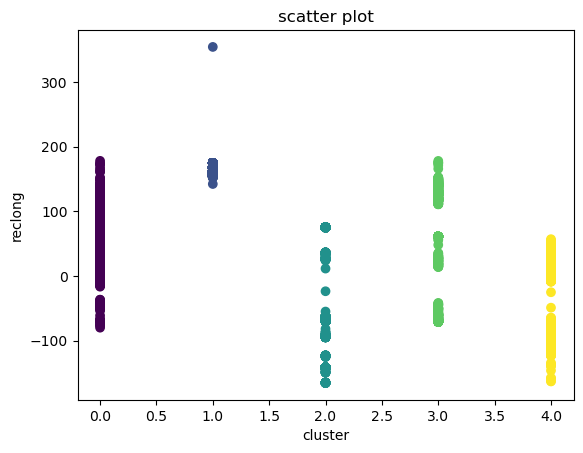

In [100]:
plt.scatter(df['cluster'], df['reclong'], c=df['cluster'], cmap='viridis')
plt.xlabel('cluster')
plt.ylabel('reclong')
plt.title('scatter plot')
plt.show()

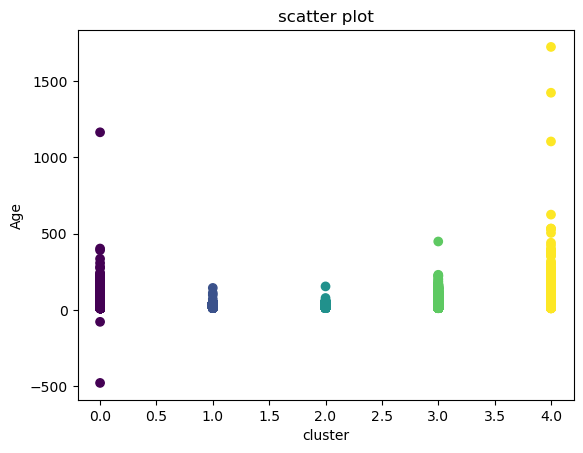

In [101]:
plt.scatter(df['cluster'], df['Age'], c=df['cluster'], cmap='viridis')
plt.xlabel('cluster')
plt.ylabel('Age')
plt.title('scatter plot')
plt.show()

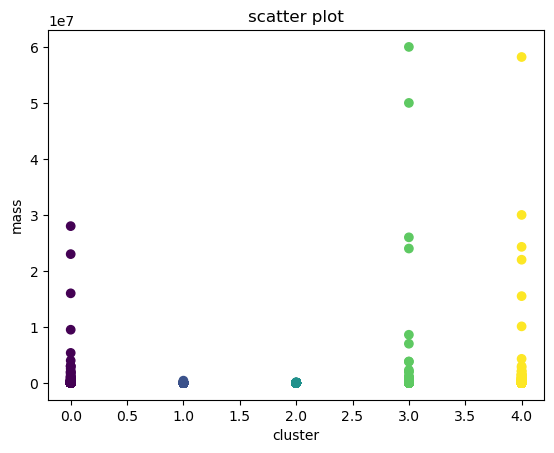

In [102]:
plt.scatter(df['cluster'], df['mass'], c=df['cluster'], cmap='viridis')
plt.xlabel('cluster')
plt.ylabel('mass')
plt.title('scatter plot')
plt.show()

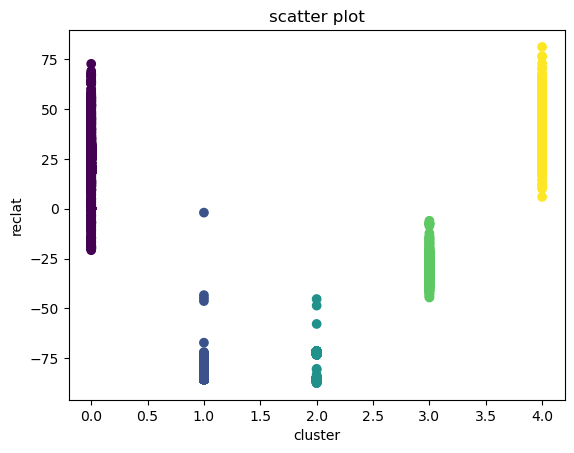

In [103]:
plt.scatter(df['cluster'], df['reclat'], c=df['cluster'], cmap='viridis')
plt.xlabel('cluster')
plt.ylabel('reclat')
plt.title('scatter plot')
plt.show()